In [222]:
%matplotlib notebook
import serial
import numpy as np
import sys
from matplotlib import pyplot as plt

In [223]:
ser = serial.Serial('/dev/ttyUSB0', 115200 ,timeout=1)

<IPython.core.display.Javascript object>


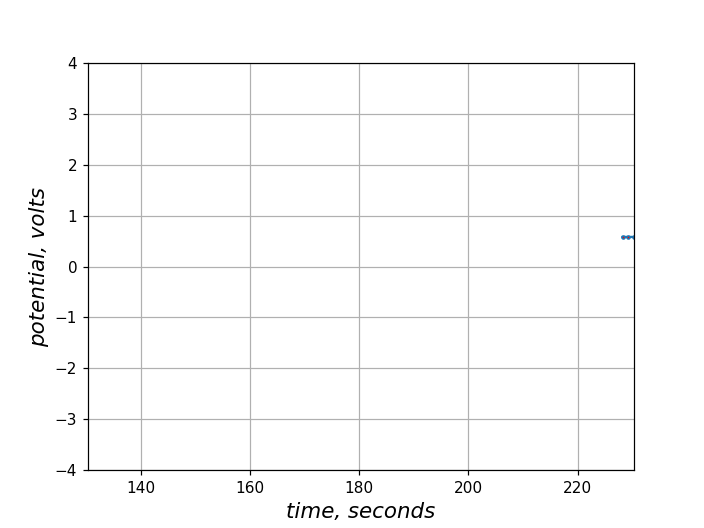

In [224]:
plt.ion() 
fig1 = plt.figure()
start_time = 0
timepoints = []
ydata = []
yrange = [-4.0,4.0]
view_time = 100 # seconds of data to view at once
duration = 24000 # total seconds to collect data
#fig1 = plt.figure()
#fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=2,markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])
line1.set_xdata(timepoints)
line1.set_ydata(ydata)

In [ ]:
ser.flushInput()
with open('radio_sun.log', 'a') as sun:
    while True:
        ser.reset_input_buffer()
        data = ser.readline().rstrip()
        sample = str(data,'utf-8') 
        #print(sample)
        inputs = sample.split()
        if len(inputs) == 2:
            t = float(inputs[0])
            v = float(inputs[1])
            #print(t,v)
            ydata.append(v)
            timepoints.append(t)
            #print(ydata,timepoints)
            current_time = t
            #line1, = plt.plot(ydata,marker='o',markersize=4,markerfacecolor='red')
            line1.set_xdata(timepoints)
            line1.set_ydata(ydata)
            # slide the viewing frame along
            if current_time > view_time:
                plt.xlim([current_time-view_time,current_time])
            fig1.canvas.draw()
            sun.write(sample)
            sun.flush()        